In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn import datasets

In [62]:
data = dataset.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
No.of.data points (rows) : 569
No.of.features (columns) : 30
No.of.classes            : 2
Class names              : ['malignant', 'benign']


In [63]:
df = pd.DataFrame(data.data)
print(df.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
dtype: object


In [64]:
from sklearn.model_selection import train_test_split
# split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=9)

print("X_train : " + str(X_train.shape))
print("y_train : " + str(y_train.shape))
print("X_test : " + str(X_test.shape))
print("y_test : " + str(y_test.shape))

X_train : (455, 30)
y_train : (455,)
X_test : (114, 30)
y_test : (114,)


In [65]:
def sigmoid(score):
  return (1 / (1 + np.exp(-score)))

def predict_probability(features, weights):
  score = np.dot(features, weights)
  return sigmoid(score)

def compute_log_likelihood(features, label, weights):
  indicator = (label==+1)
  scores    = np.dot(features, weights)
  ll        = np.sum((np.transpose(np.array([indicator]))-1)*scores - np.log(1. + np.exp(-scores)))
  return ll
def feature_derivative(errors, feature):
  derivative = np.dot(np.transpose(errors), feature)
  return derivative

In [69]:
# logistic regression without L2 regularization
def logistic_regression(features, labels, lr, epochs):

  # add bias (intercept) with features matrix
  bias      = np.ones((features.shape[0], 1))
  features  = np.hstack((bias, features))

  # initialize the weight coefficients
  weights = np.zeros((features.shape[1], 1))

  logs = []

  # loop over epochs times
  for epoch in range(epochs):

    # predict probability for each row in the dataset
    predictions = predict_probability(features, weights)

    # calculate the indicator value
    indicators = (labels==+1)

    # calculate the errors
    errors = np.transpose(np.array([indicators])) - predictions

    # loop over each weight coefficient
    for j in range(len(weights)):

      # calculate the derivative of jth weight cofficient
      derivative = feature_derivative(errors, features[:,j])
      weights[j] += lr * derivative

    # compute the log-likelihood
    ll = compute_log_likelihood(features, labels, weights)
    logs.append(ll)

  import matplotlib.pyplot as plt
  x = np.linspace(0, len(logs), len(logs))
  fig = plt.figure()
  plt.plot(x, logs)
  fig.suptitle('Training the classifier')
  plt.xlabel('Epoch')
  plt.ylabel('Log-likelihood')
  plt.show()

  return weights

In [70]:
def lr_with_regularization():
  # hyper-parameters
  learning_rate = 1e-7
  epochs        = 300000
  l2_penalty    = 0.001

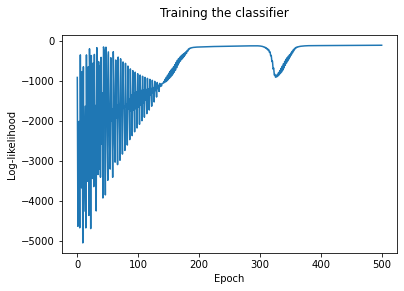

In [72]:
# hyper-parameters
learning_rate = 1e-7
epochs        = 500

# perform logistic regression
learned_weights = logistic_regression(X_train, y_train, learning_rate, epochs)

In [73]:
from sklearn.metrics import accuracy_score
# make predictions using learned weights on testing data
bias_train     = np.ones((X_train.shape[0], 1))
bias_test      = np.ones((X_test.shape[0], 1))
features_train = np.hstack((bias_train, X_train))
features_test  = np.hstack((bias_test, X_test))

test_predictions  = (predict_probability(features_test, learned_weights).flatten()>0.5)
train_predictions = (predict_probability(features_train, learned_weights).flatten()>0.5)
print("Accuracy of our LR classifier on training data: {}".format(accuracy_score(np.expand_dims(y_train, axis=1), train_predictions)))
print("Accuracy of our LR classifier on testing data: {}".format(accuracy_score(np.expand_dims(y_test, axis=1), test_predictions)))

Accuracy of our LR classifier on training data: 0.9164835164835164
Accuracy of our LR classifier on testing data: 0.9122807017543859
